# Lab 5 Problem Set
Katie Robinson

## Problem Initial
The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?

2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.

In [348]:
# functions for problem initial
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


class Integ54(Integrator):
    def set_yinit(self,new_blackconc,new_whiteconc):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        self.config["initvars"]["blackconc"] = new_blackconc
        self.config["initvars"]["whiteconc"] = new_whiteconc
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name,new_blackconc,new_whiteconc):
        super().__init__(coeff_file_name)
        self.set_yinit(new_blackconc,new_whiteconc)
        #self.set_yinit(new_whiteconc)
        self.blackconc = new_blackconc
        self.whiteconc = new_whiteconc

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

final concentration of black daises when initial blackconc is 0.03 = 0.012311427032545993
final concentration of black daises when initial blackconc is 0.04 = 0.013273831549877772
final equilibrium temperature when initial blackconc is 0.03 = 320.184761586764
final equilibrium temperature when initial blackconc is 0.04 = 320.17880142676876


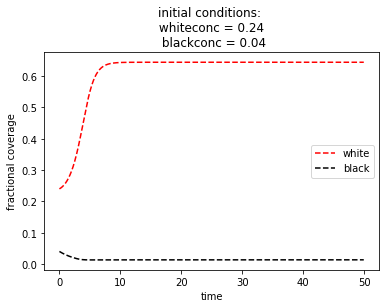

In [123]:
# plotting the fractional coverage of white and black daises with initial value of black daisies set to 
import matplotlib.pyplot as plt
import pandas as pd

theSolver1 = Integ54('initial.yaml',0.03,0.24)
#timevals, yvals, errorlist = theSolver1.timeloop5fixed()
#daisies = pd.DataFrame(yvals, columns=['white', 'black'])
#temp1 = theSolver1.find_temp(yvals)

theSolver = Integ54('initial.yaml',0.04,0.24)
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies_new = pd.DataFrame(yvals, columns=['white', 'black'])
temp_new = theSolver.find_temp(yvals)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies_new['white'])
line2, = theAx.plot(timevals, daisies_new['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('initial conditions: \n whiteconc = 0.24 \n blackconc = 0.04')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

print('final concentration of black daises when initial blackconc is 0.03 = ' + str(daisies['black'][999]))
print('final concentration of black daises when initial blackconc is 0.04 = ' + str(daisies_new['black'][999]))

print('final equilibrium temperature when initial blackconc is 0.03 = ' + str(temp1[2][1]))
print('final equilibrium temperature when initial blackconc is 0.04 = ' + str(temp_new[2][1]))

#vars(theSolver)

1) When a small fraction of black daisies is added to the initial fractional coverage (change from 0.03 to 0.04, there is very little change on the final daisy populations. The final black daisy concentration increases very slightly (by approx. 0.001). The final equilibrium temperature decreases very slightly (by approx 0.01 degree).

A) final concentration of white daises = 0.6455
A) final concentration of black daises = 0.0046
B) final concentration of white daises = 0.0
B) final concentration of black daises = 0.0


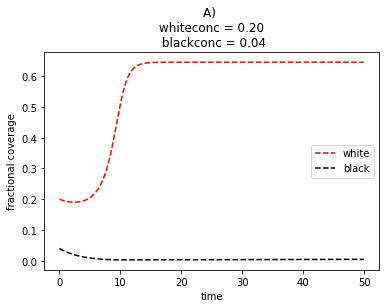

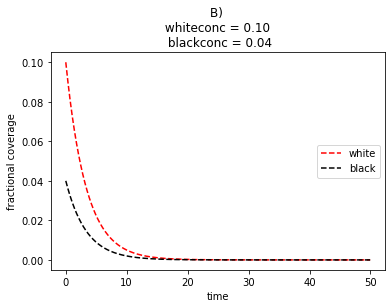

In [142]:
Whitedaisies = Integ54('initial.yaml',0.04,0.20)
timevals, yvals, errorlist = Whitedaisies.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])
temp = Whitedaisies.find_temp(yvals)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('A) \n whiteconc = 0.20 \n blackconc = 0.04')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

print('A) final concentration of white daises = ' + str(np.round(daisies['white'][999],4)))
print('A) final concentration of black daises = ' + str(np.round(daisies['black'][999],4)))

Whitedaisies2 = Integ54('initial.yaml',0.04,0.10)
timevals, yvals, errorlist = Whitedaisies2.timeloop5fixed()
daisies2 = pd.DataFrame(yvals, columns=['white', 'black'])
temp = Whitedaisies2.find_temp(yvals)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies2['white'])
line2, = theAx.plot(timevals, daisies2['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('B) \n whiteconc = 0.10 \n blackconc = 0.04')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

print('B) final concentration of white daises = ' + str(np.round(daisies2['white'][999],4)))
print('B) final concentration of black daises = ' + str(np.round(daisies2['black'][999],4)))

2) Reducing the initial fraction of white daises to 0.02 produces a non-zero steady state. However, decreasing the initial fraction of white daisies too much (ie. setting it to 0.1 as in figure B), produces a zero steady state. The white daisies stabilize to a non zero steady state when the initial concentration is sufficiently high as to stabilize the temperature without letting it become too extreme.

(array([314.96132689, 315.06763612]),
 array([324.60315045, 324.70027062]),
 array([319.84866531, 319.96401364]))

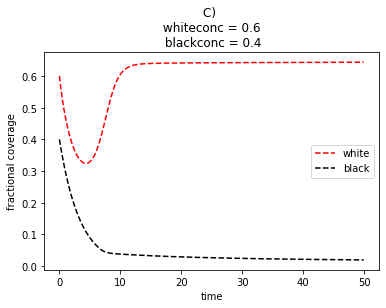

In [177]:
Whitedaisies3 = Integ54('initial.yaml',0.4,0.6)
timevals, yvals, errorlist = Whitedaisies3.timeloop5fixed()
daisies3 = pd.DataFrame(yvals, columns=['white', 'black'])
temp = Whitedaisies3.find_temp(yvals)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies3['white'])
line2, = theAx.plot(timevals, daisies3['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('C) \n whiteconc = 0.6 \n blackconc = 0.4')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')
temp

Playing around with the intial concentrations of black and white daisies has shown me that it the intial conditions of white and black daisies cannot be equal or too close together, otherwise the system coverges to a zero steady state. Additionally, the intial concentration of black daisies cannot be larger than the initial concentration of white daisies. Therefore the ideal conditions for producing a non zero steady is to have the intial concentration of white daises $>$ the intitial concentration of black daisies.

## Problem Estimate
In the demo below, compare the error estimate to the true error, on the initial value problem from Lab 4,

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$

which has the exact solution

$$y(t) = t + e^{-t}$$

1.  Play with the time step and final time, attempting small changes at first. How reasonable is the error estimate?

2.  Keep decreasing the time step. Does the error estimate diverge from the computed error? Why?

3.  Keep increasing the time step. Does the error estimate diverge? What is happening with the numerical solution?

In [269]:
# Functions for problem estimate
from numlabs.lab5.lab5_funs import Integrator


class Integ55(Integrator):
    def set_yinit(self,timestep,t_end):
        #
        # read in 'c1 c2 c3'
        #
        self.config["timevars"]["dt"] = timestep
        self.config["timevars"]["tend"] = t_end
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        timevars = namedtuple('timevars', self.config['timevars'].keys())
        self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.timevars.dt, self.timevars.tend])
        
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name,timestep,t_end):
        super().__init__(coeff_file_name)
        self.set_yinit(timestep,t_end)
        self.dt = timestep
        self.tend = t_end

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        user = self.uservars
        f = np.empty_like(self.yinit)
        f[0] = user.c1 * y[0] + user.c2 * theTime + user.c3
        return f

Text(0.5, 1.0, 'lab 5 interactive 5 -- fixed errors')

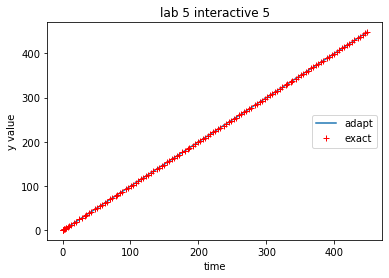

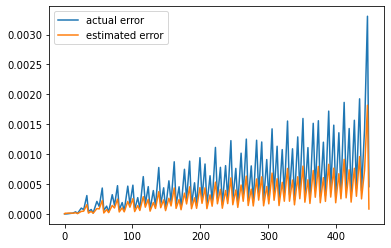

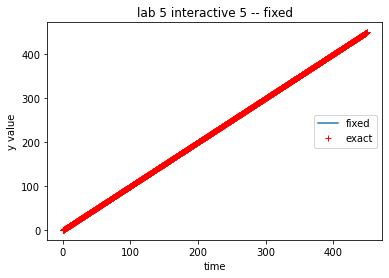

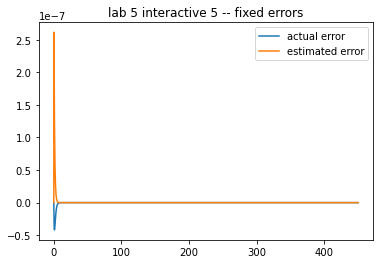

In [272]:
# Solve and plot for problem estimate
import matplotlib.pyplot as plt

theSolver = Integ55('expon.yaml',0.25,450)

timeVals, yVals, yErrors = theSolver.timeloop5Err()
timeVals = np.array(timeVals)
exact = timeVals + np.exp(-timeVals)
yVals = np.array(yVals)
yVals = yVals.squeeze()
yErrors = np.array(yErrors)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, yVals, label='adapt')
line2 = theAx.plot(timeVals, exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig, theAx = plt.subplots(1, 1)
realestError = yVals - exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')

timeVals, yVals, yErrors = theSolver.timeloop5fixed()

np_yVals = np.array(yVals).squeeze()
yErrors = np.array(yErrors)
np_exact = timeVals + np.exp(-timeVals)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, np_yVals, label='fixed')
line2 = theAx.plot(timeVals, np_exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig, theAx = plt.subplots(1, 1)
realestError = np_yVals - np_exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')

#vars(theSolver)

From playing around with the timestep and length of simulation, it is clear that the error estimate diverges from the actual error the longer that the simulation runs for. Estimates of error early on in the run are much closer to the actual error than at the end of the run. The difference between the estimated error and the actual error also decreases as the time step decreases.

Text(0.5, 1.0, 'lab 5 interactive 5 -- fixed errors')

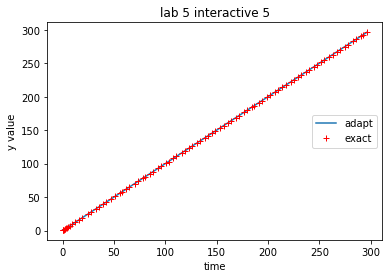

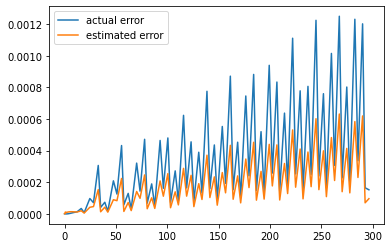

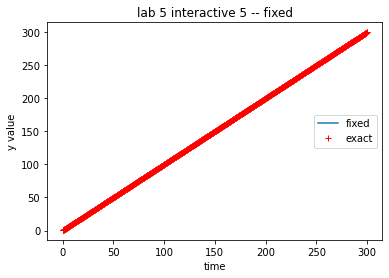

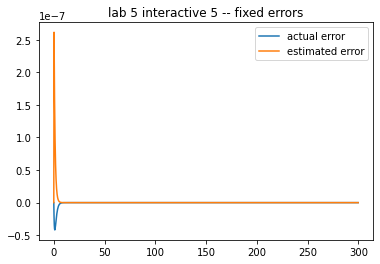

In [242]:
# Solve and plot for problem estimate
import matplotlib.pyplot as plt

theSolver = Integ55('expon.yaml',10,300)
#theSolver = Integ55('expon.yaml',0.25,300)

timeVals, yVals, yErrors = theSolver.timeloop5Err()
timeVals = np.array(timeVals)
exact = timeVals + np.exp(-timeVals)
yVals = np.array(yVals)
yVals = yVals.squeeze()
yErrors = np.array(yErrors)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, yVals, label='adapt')
line2 = theAx.plot(timeVals, exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig, theAx = plt.subplots(1, 1)
realestError = yVals - exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')

timeVals, yVals, yErrors = theSolver.timeloop5fixed()

np_yVals = np.array(yVals).squeeze()
yErrors = np.array(yErrors)
np_exact = timeVals + np.exp(-timeVals)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, np_yVals, label='fixed')
line2 = theAx.plot(timeVals, np_exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig, theAx = plt.subplots(1, 1)
realestError = np_yVals - np_exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')

#vars(theSolver)

As the timestep decreases, the difference between the computed error and estimated error decreases. As you increase the time step, eventually the error estimate diverges from the computed error. The adaptive timestep method is less sensitive to changes in initial dt than the fixed timestep method. This is because in the adaptive timestep method, the algorithm is designed to ensure that the accuracy always remains within a tolerable limit while maximize computational efficiency. Therefore, increasing the intitial timestep may not have as big of an effect on the global error as it does for the fixed timestep case, since the adaptive timestep algorithm will decrease the timestep during the run if the error being produced are too large. 

## Problem adaptive
The demos in the previous section solved the Daisyworld equations using the embedded Runge-Kutta methods with adaptive timestep control.

1.  Run the code and find solutions of Daisyworld with the default settings found in adapt.yaml using the timeloop5Err adaptive code

2.  Find the solutions again but this time with fixed stepsizes and compare the size of the timesteps and number of the timesteps.

3.  How much faster does the fixed timeloop need to be to give the same performance as the adaptive timeloop for this case?

<a name="sec_steady"></a>




In [256]:
# I am using the timing code from worksheet_speedingupcode.py
seconds_units = {}
seconds_units['ns'] = 1E-9
seconds_units['us'] = 1E-6
seconds_units['ms'] = 1E-3

In [326]:
#%%capture result_pre
#%%timeit -n100

# run with DEFAULT settings and adaptive timestep

theSolver = Integ54('adapt.yaml',0.7,0.2)
timeVals, yVals, errorList = theSolver.timeloop5Err()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])

22

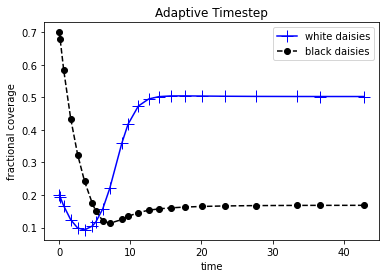

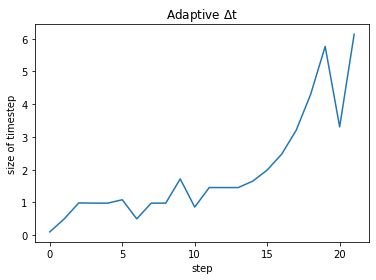

In [314]:
thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theAx.set_title('Adaptive Timestep')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

# calculate number of timesteps and size of each time step
timesteps = []
for i in range(0,len(timeVals)-1):
    step = timeVals[i+1] - timeVals[i]
    timesteps.append(step)
    
plt.figure()
plt.plot(timesteps)
plt.ylabel('size of timestep')
plt.xlabel('step')
plt.title('Adaptive $\Delta$t')

len(timesteps)

In [330]:
print(result_pre)

13.7 ms +- 328 us per loop (mean +- std. dev. of 7 runs, 100 loops each)



In [324]:
#%%capture result_post
#%%timeit -n100

# run with DEFAULT settings and fixed timestep

theSolver_fixed = Integ54('adapt.yaml',0.7,0.2)
#timeVals, yVals, errorList = theSolver.timeloop5Err()
timeVals,yVals,errorList=theSolver_fixed.timeloop5fixed()
whiteDaisies=[frac[0] for frac in yVals]

yvalsfixed = pd.DataFrame.from_records(yVals, columns=['white', 'black'])

In [331]:
print(result_post)

143 ms +- 1.9 ms per loop (mean +- std. dev. of 7 runs, 100 loops each)



499

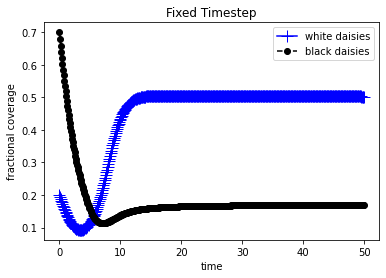

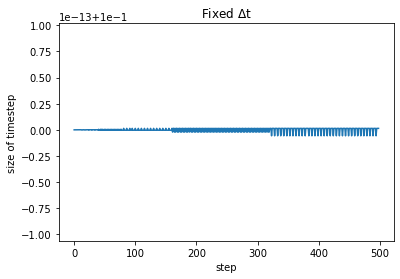

In [319]:
thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvalsfixed['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvalsfixed['black'], '--ko', label='black daisies')
theAx.set_title('Fixed Timestep')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

# calculate number of timesteps and size of each time step
timesteps_fixed = []
for i in range(0,len(timeVals)-1):
    step = timeVals[i+1] - timeVals[i]
    timesteps_fixed.append(step)
    
plt.figure()
plt.plot(timesteps_fixed)
plt.ylabel('size of timestep')
plt.xlabel('step')
plt.title('Fixed $\Delta$t')

len(timesteps_fixed)

In [334]:
# print time taken pre speed-up from the values saved by the "magic" code in previous cell
time_pre = float(str(result_pre).split()[0])
units_pre = (str(result_pre).split()[1])

print(time_pre, units_pre)
# convert units to numerical value
time_pre_seconds = time_pre*seconds_units[units_pre]

# print time taken pre speed-up from the values saved by the "magic" code in previous cell
time_post = float(str(result_post).split()[0])
units_post = (str(result_post).split()[1])

# convert units to numerical value and calculate speedup factor
time_post_seconds = time_post*seconds_units[units_post]
speedup = time_pre_seconds/time_post_seconds
print("speedup factor = " + "{:4.1f}".format(speedup))

13.7 ms
speedup factor =  0.1


The plots above compare the adaptive timestepping with the fixed timestepping. Since the adaptive method adjusts the timestep according to the computed error, the run proceeds much more quickly. As you can see in the plot of the adaptive time step sizes, the timestep starts out small at the initial value of 0.1, but increases as the run progresses. In total, it only takes 22 timesteps to reach t_end. However, in the fixed timestep method, 499 steps of 0.1 are needed to reach t_end. Using the timing code from worksheet_speedingupcode.py, I found that the adaptive method is faster than the fixed method by approximately 130 ms.

## Problem Predator
To make life a little more interesting on Daisyworld, add a population of rabbits that feed upon the daisies. The
rabbit birth rate will be proportional to the area covered by the daisies while, conversely, the daisy *death rate* will be proportional to the rabbit population.

Add another equation to the Daisyworld model which governs the rabbit population and make the appropriate modifications to the existing daisy equations. Modify the set of equations and solve it with the Runge-Kutta method with adaptive timesteps. Use it to look for steady states and to determine their dependence on the initial conditions and model parameters.

Hand in notebook cells that:

1.  Show your modified Daisyworld equations and your new integrator class.

2.  At least one set of parameter values and initial conditions that leads to the steady state and a plot of the timeseries for the daisies and rabbits.

3.  A discussion of the steady state’s dependence on these values, i.e. what happens when they are altered. Include a few plots for illustration.

4.  Does adding this feedback extend the range of habital L values  for which non-zero populations exist?

**Bonus:**: Now consider foxes that prey on rabbits but
leave the daisies alone.

In [458]:
# New integrator class that includes 

class Rabbits(Integrator):
    def set_yinit(self,new_blackconc,new_whiteconc,bunny_conc):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        self.config["initvars"]["blackconc"] = new_blackconc
        self.config["initvars"]["whiteconc"] = new_whiteconc
        self.config["initvars"]["bunnyconc"] = bunny_conc
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.whiteconc, self.initvars.blackconc,self.initvars.bunnyconc])
        self.nvars = len(self.yinit)
        return self.yinit

    def __init__(self, coeff_file_name,new_blackconc,new_whiteconc,bunny_conc):
        super().__init__(coeff_file_name)
        self.set_yinit(new_blackconc,new_whiteconc,bunny_conc)
        #self.set_yinit(new_whiteconc)
        self.blackconc = new_blackconc
        self.whiteconc = new_whiteconc
        self.bunnyconc = bunny_conc

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           y[2]=fraction of bunnies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1] - y[2]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[2] = y[2] * (user.beta_r * bare - user.chiR)
        f[0] = y[0] * (beta_w * bare - user.chi*f[2])
        f[1] = y[1] * (beta_b * bare - user.chi*f[2])
        
        return f

To the file adapt.yaml I added the variable 'bunnyconc'under initvars. This variable represents the initial concentration of bunnies in the simulation. The rabbit concentration changes over time according to $$\frac{dR}{dt} = A_R(\beta_R x-\chi_R),$$ where $\beta_R$ is the bunny growth rate and x is the fractional area of bare ground, $$x = 1 - A_w - A_b - A_R,$$ and $\chi_R$ is the bunny death rate. These variables ($\beta_R$, $\chi_R$) were also added to the initvars file under uservars.

Additionally, I added the rabbit population into the daisy equations, so that the daisy death rate is proportional to the population of rabbits. The more rabbits there are, the more quickly the population of daisies will decline. The new daisy equations are $$\frac{dA_b}{dt} = A_b(\beta_b x-\chi A_R),$$ $$\frac{dA_w}{dt} = A_w(\beta_w x-\chi A_R).$$

Below are three examples of how the steady state might change depending on the inital concentrations of the three species.

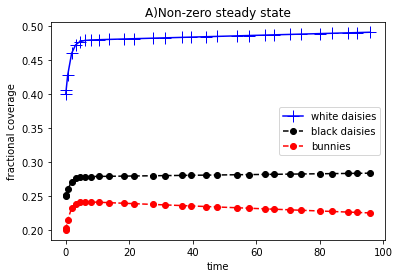

In [464]:
Predators = Rabbits('adapt.yaml',0.25,0.4,0.2)
timeVals, yVals, errorList = Predators.timeloop5Err()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black','bunnies'])
#yVals

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theLine2, = theAx.plot(timeVals, yvals['bunnies'], '--ro', label='bunnies')
theAx.set_title('A)Non-zero steady state')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

In the plot above, I show a set of intial conditions that produce a steady state between the daisies and bunnies. $\beta_R$ is set to 1 and $\chi_R$ is set to 0.001. The initial concentrations of white daisies, black daisies, and bunnies are 0.4, 0.25, and 0.2, respectively. 

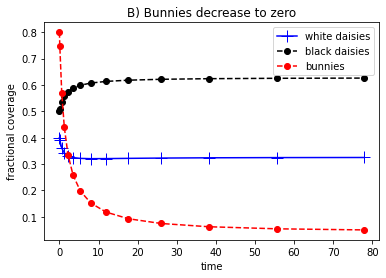

In [463]:
Predators = Rabbits('adapt.yaml',0.5,0.4,0.8)
timeVals, yVals, errorList = Predators.timeloop5Err()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black','bunnies'])
#yVals

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theLine2, = theAx.plot(timeVals, yvals['bunnies'], '--ro', label='bunnies')
theAx.set_title('B) Bunnies decrease to zero')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

Above in plot B is another example of a situation in which the simulation the daisies reach steady state but the bunny population declines to zero. This allows the daisies to be stable, while the bunny population cannot grow again since the daisies are taking up nearly 100% of the planets area. 

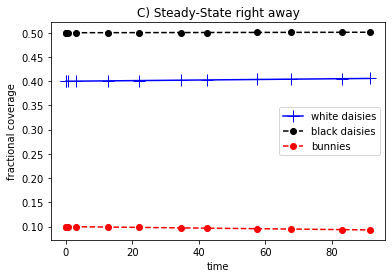

In [461]:
Predators = Rabbits('adapt.yaml',0.5,0.4,0.1)
timeVals, yVals, errorList = Predators.timeloop5Err()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black','bunnies'])
#yVals

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theLine2, = theAx.plot(timeVals, yvals['bunnies'], '--ro', label='bunnies')
theAx.set_title('C) Steady-State right away')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

Another interesting case is where the initial concentrations of white daisies, black daisies, and bunnies are 0.4, 0.5, and 0.1, respectively. With these initial values the system is essentially already at steady state from the very beginning, and the fractional coverage of all three species hardly changes throughout the simulation. 

I believe that adding this additional feedback does extend the range of scenarios in which non-zero steady state populations might exist, since the three populations keep one another in check. For example, the daisy populations cannot grow too large because the rabbit population will cause them to decline, and the rabbit population cannot grow too much because it requires the existence of daisies to stay alive.